## **Content based recommendation system**

Importing python libraries and dataset 

In [ ]:
!pip install rake_nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rake_nltk import Rake
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
df = pd.read_csv('IMDB_Top250Engmovies2_OMDB_Detailed.csv')
df.head()

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
0,1,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True
1,2,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True
2,3,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather_part...,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/,True
3,4,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the_dark_knight/,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True
4,5,12 Angry Men,1957,APPROVED,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1000013-12_ang...,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men,True


In [ ]:
df.shape

(250, 38)

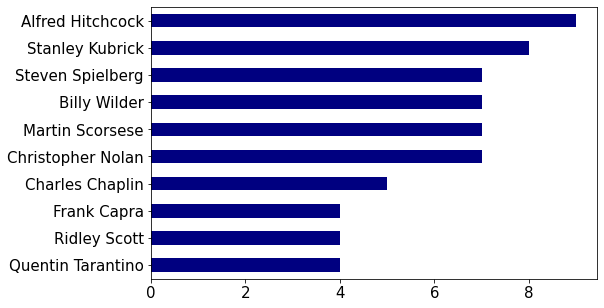

In [ ]:
df['Director'].value_counts()[0:10].plot(kind = 'barh', figsize=[8,5], fontsize=15, color='navy').invert_yaxis()

Data pre-processing to remove stop words, punctuation, white space, and convert all words to lower case

In [ ]:

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['Key_words'] = ''
r = Rake()
for i in range(0,249):
  r.extract_keywords_from_text(df['Plot'][i])
  key_words_dict_scores = r.get_word_degrees()
  df['Key_words'][i] = list(key_words_dict_scores.keys())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:

#df['Key_words'] = ''
#r = Rake()
#for index, row in df.iterrows():
#    r.extract_keywords_from_text(row['Plot'])
#    key_words_dict_scores = r.get_word_degrees()
#    row['Key_words'] = list(key_words_dict_scores.keys())

In [ ]:
df.shape

(250, 39)

In [ ]:
df.head()

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response,Key_words
0,1,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",...,NaN,NaN,NaN,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True,"[two, imprisoned, men, bond, number, years, fi..."
1,2,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",...,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True,"[aging, patriarch, organized, crime, dynasty, ..."
2,3,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",...,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather_part...,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/,True,"[early, life, career, vito, corleone, 1920s, n..."
3,4,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",...,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the_dark_knight/,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True,"[menace, known, joker, emerges, mysterious, pa..."
4,5,12 Angry Men,1957,APPROVED,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1000013-12_ang...,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men,True,"[jury, holdout, attempts, prevent, miscarriage..."


In [ ]:
#df['Genre'] = df['Genre'].map(lambda x: x.split(','))
#df['Actors'] = df['Actors'].map(lambda x: x.split(',')[:3])
#df['Director'] = df['Director'].map(lambda x: x.split(','))
#for index, row in df.iterrows():
#    row['Genre'] = [x.lower().replace(' ','') for x in row['Genre']]
#    row['Actors'] = [x.lower().replace(' ','') for x in row['Actors']]
#    row['Director'] = [x.lower().replace(' ','') for x in row['Director']]

In [ ]:
df['Genre'] = df['Genre'].map(lambda x: x.split(','))
for l in df['Genre']:
  for i in range(len(l)):
    l[i] = l[i].lower()

In [ ]:
df['Actors'] = df['Actors'].map(lambda x: x.split(',')[:3])   #First three actors
for l in df['Actors']:    #l is the list of actor names
  for i in range(len(l)):
    x = l[i].split(' ')    #Old word
    y = ''    #New word           
    for j in range(len(x)):
      y += x[j].lower()
    l[i] = y 

In [ ]:
df['Director'] = df['Director'].map(lambda x: x.split(','))   #List of director' name
for l in df['Director']:    #l is the list of Director name
  for i in range(len(l)):
    x = l[i].split(' ')    #Old word
    y = ''    #New word           
    for j in range(len(x)):
      y += x[j].lower()
    l[i] = y 

In [ ]:
df.head()


,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response,Key_words
0,1,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"[crime, drama]",[frankdarabont],"Stephen King (short story ""Rita Hayworth and S...","[timrobbins, morganfreeman, bobgunton]",...,NaN,NaN,NaN,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True,"[two, imprisoned, men, bond, number, years, fi..."
1,2,The Godfather,1972,R,24 Mar 1972,175 min,"[crime, drama]",[francisfordcoppola],"Mario Puzo (screenplay), Francis Ford Coppola ...","[marlonbrando, alpacino, jamescaan]",...,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True,"[aging, patriarch, organized, crime, dynasty, ..."
2,3,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"[crime, drama]",[francisfordcoppola],"Francis Ford Coppola (screenplay), Mario Puzo ...","[alpacino, robertduvall, dianekeaton]",...,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather_part...,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/,True,"[early, life, career, vito, corleone, 1920s, n..."
3,4,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"[action, crime, drama]",[christophernolan],"Jonathan Nolan (screenplay), Christopher Nolan...","[christianbale, heathledger, aaroneckhart]",...,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the_dark_knight/,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True,"[menace, known, joker, emerges, mysterious, pa..."
4,5,12 Angry Men,1957,APPROVED,01 Apr 1957,96 min,"[crime, drama]",[sidneylumet],"Reginald Rose (story), Reginald Rose (screenplay)","[martinbalsam, johnfiedler, leej.cobb]",...,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1000013-12_ang...,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men,True,"[jury, holdout, attempts, prevent, miscarriage..."


Create word representation by combining column attributes to Bag_of_words

In [ ]:
#df['Bag_of_words'] = ''
#columns = ['Genre', 'Director', 'Actors', 'Key_words']
#for index, row in df.iterrows():
#    words = ''
#    for col in columns:
#        words += ' '.join(row[col]) + ' '
#    row['Bag_of_words'] = words
    
#df = df[['Title','Bag_of_words']]

In [ ]:
df['Bag_of_words'] = ''        #New column of bag of words
columns = ['Genre', 'Director', 'Actors', 'Key_words']       #Columns to be combined

for i in range(250):
  trial = ''
  for column in columns:
    for word in df[column][i]:
      trial += word+" "
  df['Bag_of_words'][i] = trial   

df = df[['Title','Bag_of_words']]         #New data frame has only title and bag of words as columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
df.head()

,Title,Bag_of_words
0,The Shawshank Redemption,crime drama frankdarabont timrobbins morganfr...
1,The Godfather,crime drama francisfordcoppola marlonbrando a...
2,The Godfather: Part II,crime drama francisfordcoppola alpacino rober...
3,The Dark Knight,action crime drama christophernolan christia...
4,12 Angry Men,crime drama sidneylumet martinbalsam johnfied...


In [ ]:
df['Bag_of_words']

0      crime  drama frankdarabont timrobbins morganfr...
1      crime  drama francisfordcoppola marlonbrando a...
2      crime  drama francisfordcoppola alpacino rober...
3      action  crime  drama christophernolan christia...
4      crime  drama sidneylumet martinbalsam johnfied...
                             ...                        
245    drama  film-noir billywilder raymilland janewy...
246    drama destindanielcretton brielarson johngalla...
247    comedy  drama  romance howardhawks carygrant r...
248    biography  drama davidlynch sissyspacek janega...
249    drama dannyboyle loveleentandan devpatel saura...
Name: Bag_of_words, Length: 250, dtype: object

Create vector representation for Bag_of_words, and create the similarity matrix

In [ ]:
count = CountVectorizer()
count_matrix = count.fit_transform(df['Bag_of_words'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim)

[[1.         0.15789474 0.13764944 ... 0.05263158 0.05263158 0.09365858]
 [0.15789474 1.         0.36706517 ... 0.05263158 0.05263158 0.09365858]
 [0.13764944 0.36706517 1.         ... 0.04588315 0.04588315 0.08164966]
 ...
 [0.05263158 0.05263158 0.04588315 ... 1.         0.05263158 0.09365858]
 [0.05263158 0.05263158 0.04588315 ... 0.05263158 1.         0.09365858]
 [0.09365858 0.09365858 0.08164966 ... 0.09365858 0.09365858 1.        ]]


In [ ]:
indices = pd.Series(df['Title'])

Running and Testing the model

In [ ]:
def recommend(title, cosine_sim = cosine_sim):
    recommended_movies = []
    idx = indices[indices == title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)
    
    for i in top_10_indices:
        recommended_movies.append(list(df['Title'])[i])
        
    return recommended_movies

In [ ]:
recommend('The Avengers')

['Guardians of the Galaxy Vol. 2',
 'Guardians of the Galaxy',
 'Aliens',
 'The Martian',
 'Interstellar',
 'Blade Runner',
 'Terminator 2: Judgment Day',
 'The Thing',
 'The Terminator',
 'Spider-Man: Homecoming']